In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

In [79]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,196 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and d

In [4]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bag_of_Word_Meets_Bags_of_Popcorn/labeledTrainData.tsv", header=0, delimiter='\t',quoting=3)
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bag_of_Word_Meets_Bags_of_Popcorn/testData.tsv", header=0, delimiter='\t',quoting=3)

"""
header = 0 은 파일의 첫번째 줄에 열 일므이 있음을 나타냄
delimiter = '\t'는 필드가 탭으로 구분되는 것을 의미한다
quoting = 3은 쌍 따옴표를 무시한다
"""

"\nheader = 0 은 파일의 첫번째 줄에 열 일므이 있음을 나타냄\ndelimiter = '\t'는 필드가 탭으로 구분되는 것을 의미한다\nquoting = 3은 쌍 따옴표를 무시한다\n"

In [5]:
train.shape

(25000, 3)

In [6]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [7]:
test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [8]:
# sentiment는 긍정과 부정을 나타냄 1은 긍정 0 은 부정

In [9]:
sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bag_of_Word_Meets_Bags_of_Popcorn/labeledTrainData.tsv', header=0, delimiter='\t')

In [10]:
sample.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [11]:
#quoting = 3은 쌍따옴표를 무시한다고 되어있는데 적용을하지 않으면 쌍따옴표를 가지고 오지 않음

In [12]:
test.shape

(25000, 2)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [14]:
train.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [15]:
train['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [16]:
#정확히 5:5로 데이터가 나눠져있는것을 확인 할 수 있다.

In [17]:
train.describe(exclude=[np.number])

,id,review
count,25000,25000
unique,25000,24904
top,"""1203_4""","""How has this piece of crap stayed on TV this ..."
freq,1,3


In [18]:
train['review'][0][:700]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

In [19]:
from bs4 import BeautifulSoup

In [20]:
examplel = BeautifulSoup(train['review'][0], "html5lib")
print(train['review'][0][:700])
examplel.get_text()[:700]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik


'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [21]:
import re

#소문자와 대문자가 아닌 것은 공백으로 대체한다.
#[^ 문자];를 제외하라는 정규표현식 ^은 not 의미

letters_only = re.sub('[^a-zA-Z]',' ', examplel.get_text())
letters_only

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m

In [22]:
lower_case = letters_only.lower()

words = lower_case.split()
print(len(words))
words[:10]

437


['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with']

In [23]:
#lower을 이용해 모두 소문자로 바꿔줌, with, all, this 와 같은 대명사나 전치사는 어떠한 정보를 갖고 있다고 보기 힘듬 그러니 정리해준다.

In [24]:
nltk.download('stopwords')

NameError: ignored

In [25]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [26]:
#불용어 제거

words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]

219


['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [27]:
#포터 스테머
stemmer = nltk.stem.PorterStemmer()

print(stemmer.stem('maximum'))
print("The stemmed form of running is: {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(stemmer.stem("run")))

maximum
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [28]:
#랭커스터 스태머의 사용예

from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
print(lancaster_stemmer.stem('maximun'))
print("The stemmed form of running is: {}". format(lancaster_stemmer.stem("running")))
print("The stemmed form of runs is: {}". format(lancaster_stemmer.stem("runs")))
print("The stemmed form of run is: {}". format(lancaster_stemmer.stem("run")))

maximun
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [29]:
#처리 전 단어
words[:10]

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [30]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english') #snowballstemmer는 어떤 언어를 할 지 첫번쨰 인자에서 정해야함
words = [stemmer.stem(w) for w in words]
words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

In [31]:
def review_to_words(raw_review):
  #1. html remove
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
  #2. blank exchange
  letters_only = re.sub('[^a-zA-Z]',' ', review_text)
  #3. lower exchange
  words = letters_only.lower().split()
  #4. 파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다.
  #stopwords를 세트로 형변환 한다
  stops = set(stopwords.words('english'))
  #5. Stopwords를 이용해 불용어 제거
  meaningful_words = [w for w in words if not w in stops]
  #6. 어간추출
  stemming_words = [stemmer.stem(w) for w in meaningful_words]
  #7. 공백으로 구분된 문자열로 결합하여 결과를 변환
  return(" ".join(stemming_words))



In [32]:
clean_review = review_to_words(train['review'][0])
clean_review

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [33]:
num_reviews = train['review'].size
num_reviews

25000

In [34]:
clean_train_reviews = []
for i in range(0, num_reviews):
  if (i+1) % 5000 == 0:
    print('Review {} of {}'.format(i+1, num_reviews))
  clean_train_reviews.append(review_to_words(train['review'][i]))

Review 5000 of 25000
Review 10000 of 25000
Review 15000 of 25000
Review 20000 of 25000
Review 25000 of 25000


In [35]:
%time train['review_clean'] = train['review'].apply(review_to_words)

CPU times: user 58.7 s, sys: 625 ms, total: 59.3 s
Wall time: 59.4 s


In [36]:
from multiprocess import Pool
import numpy as np

In [37]:
def _apply_df(args):
  df, func, kwargs = args
  return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
  workers = kwargs.pop('workers')
  pool = Pool(processes=workers)
  result = pool.map(_apply_df, [(d, func, kwargs) for d in np.array_split(df, workers)])
  pool.close()

  return pd.concat(list(result))

In [38]:
%time

clean_train_reviews = apply_by_multiprocessing(train['review'], review_to_words, workers=4)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


In [39]:
%time

clean_train_reviews = apply_by_multiprocessing(test['review'], review_to_words, workers=4)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs


In [40]:
#단어 수
train['num_words'] = clean_train_reviews.apply(lambda x: len(str(x).split()))
#중복을 제거한 단어 수
train['num_uniq_words'] = clean_train_reviews.apply(lambda x: len(set(str(x).split())))

In [41]:
test['num_uniq_words'] = clean_train_reviews.apply(lambda x: len(str(x).split()))

In [42]:
#위 함수에 대한 이해를 위해 첫 번째 리뷰로 돌아가는 모습을 체크

x = clean_train_reviews[0]
x = str(x).split()
print(len(x))
x[:10]

72


['natur',
 'film',
 'main',
 'theme',
 'mortal',
 'nostalgia',
 'loss',
 'innoc',
 'perhap',
 'surpris']

리뷰별 단어 평균 값 : 116.75996
리뷰별 단어 중간 값 : 87.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


리뷰별 고유 단어 평균 값 : 92.0688
리뷰별 고유 단어 중간 값 : 73.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '리뷰별 고유한 단어 수 분포')

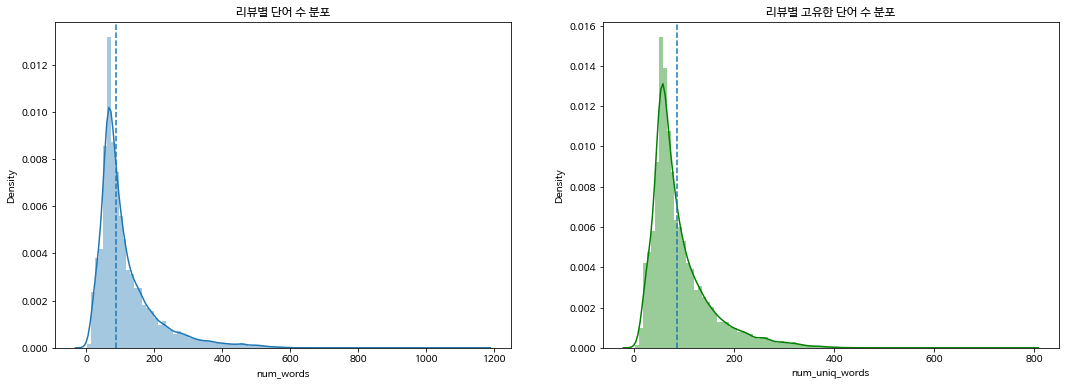

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

fig,axes = plt.subplots(ncols=2)
fig.set_size_inches(18, 6)
print('리뷰별 단어 평균 값 :', train['num_words'].mean())
print('리뷰별 단어 중간 값 :', train['num_words'].median())
sns.distplot(train['num_words'], bins=100, ax=axes[0])
axes[0].axvline(train['num_words'].median(), linestyle='dashed') #중간값 표시
axes[0].set_title('리뷰별 단어 수 분포')

print('리뷰별 고유 단어 평균 값 :', train['num_uniq_words'].mean())
print('리뷰별 고유 단어 중간 값 :', train['num_uniq_words'].median())
sns.distplot(train['num_uniq_words'], bins=100, color='g', ax=axes[1])
axes[1].axvline(train['num_words'].median(), linestyle='dashed')
axes[1].set_title('리뷰별 고유한 단어 수 분포')